#### LoRRA Train Log 시각화 
- Train loss : step 별 loss 그래프
- Validation Accuracy : validatioin (TruthfulQA, ARC-Easy) Accuracy 그래프

In [ ]:
json_file_name="./lorra_tqa_7b/trainer_state.json"

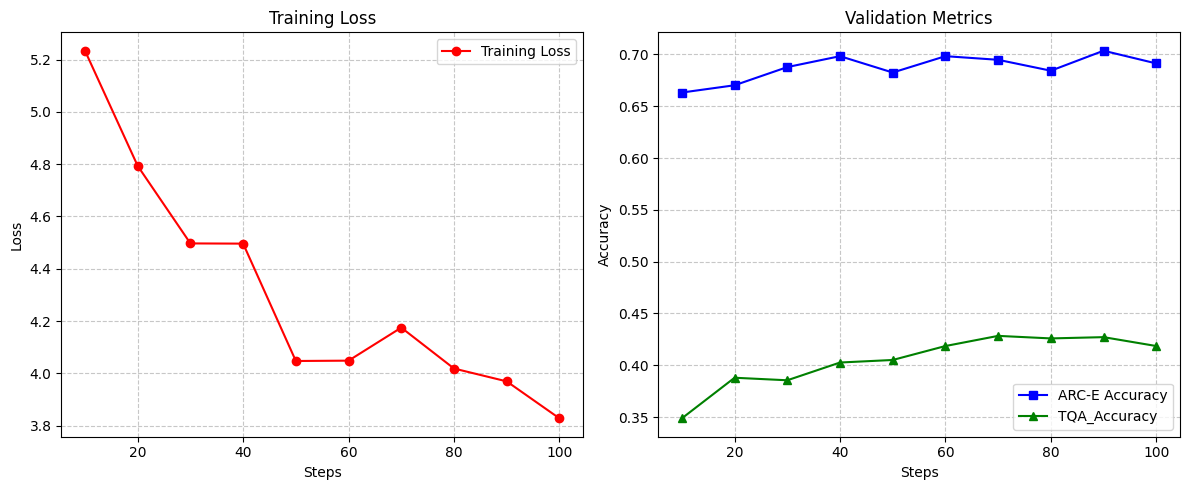

In [8]:
import json
import matplotlib.pyplot as plt

with open(json_file_name,'r') as f:
    log_data=json.load(f)

train_steps=[]
train_loss=[]
eval_steps=[]
arc_acc=[]
tqa_acc=[]

history=log_data["log_history"][:-2]

for i, entry in enumerate(history):
    if i%2==0:
        train_steps.append(entry["step"])
        train_loss.append(entry["loss"])
    else:
        eval_steps.append(entry["step"])
        arc_acc.append(entry["arc-e_accuracy"])
        tqa_acc.append(entry["tqa_accuracy"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_steps,train_loss,marker='o',color="red",label="Training Loss")
plt.title("Training Loss")
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()

plt.subplot(1,2,2)
plt.plot(eval_steps,arc_acc,marker='s',color='blue',label='ARC-E Accuracy')
plt.plot(eval_steps,tqa_acc,marker='^',color='green',label='TQA_Accuracy')
plt.title('Validation Metrics')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.7)

plt.tight_layout()
plt.show()